In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load your dataset
df_melted = pd.read_csv('donations_data.csv')  # Replace with your actual file path

# Display the shape of the dataset
print("Dataset shape:", df_melted.shape)
print(df_melted.head())

Dataset shape: (716, 12)
          Members Name 2024-01 2024-02 2024-03 2024-04   2024-05  2024-06  \
0  Noor Fatima Sadaqat       0     500     600       0      0.00      0.0   
1       Zunaira Shafiq    2000     500     750     800      0.00      0.0   
2        Muneeb Salman    6946       0    2000   13610  15750.00  22200.0   
3        Mubasal Malik   32082   50395   11040   62750   6483.00      0.0   
4        Nasir Mukhtar       0    6750    5000    6000  27153.27  20700.0   

   2024-07  2024-08  2024-09  2024-10  2024-11  
0      0.0    300.0   1350.0   1000.0   1390.0  
1      0.0      0.0   5680.0   8755.0   9465.0  
2  29791.0  88200.0  71418.0  49454.0  71311.0  
3    200.0      0.0   3200.0      0.0   4000.0  
4  35356.0  16000.0  18850.0  14000.0  11200.0  


In [3]:
# Preprocessing: Replace NaN, 'R', and 'O' with 0
df_melted.replace(to_replace=[np.nan, 'R', 'O'], value=0, inplace=True)

# Convert all relevant columns to numeric
df_melted.iloc[:, 1:] = df_melted.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Check the cleaned data
print(df_melted.head())

          Members Name  2024-01 2024-02 2024-03  2024-04   2024-05  2024-06  \
0  Noor Fatima Sadaqat      0.0     500     600      0.0      0.00      0.0   
1       Zunaira Shafiq   2000.0     500     750    800.0      0.00      0.0   
2        Muneeb Salman   6946.0       0    2000  13610.0  15750.00  22200.0   
3        Mubasal Malik  32082.0   50395   11040  62750.0   6483.00      0.0   
4        Nasir Mukhtar      0.0    6750    5000   6000.0  27153.27  20700.0   

   2024-07  2024-08  2024-09  2024-10  2024-11  
0      0.0    300.0   1350.0   1000.0   1390.0  
1      0.0      0.0   5680.0   8755.0   9465.0  
2  29791.0  88200.0  71418.0  49454.0  71311.0  
3    200.0      0.0   3200.0      0.0   4000.0  
4  35356.0  16000.0  18850.0  14000.0  11200.0  


In [4]:
# Prepare the data for training
X = df_melted.iloc[:, 1:-1].values  # Features: all months except the last
y = df_melted.iloc[:, -1].values     # Target: last month's donations

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# List of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "K-Neighbors": KNeighborsRegressor(),
    "Ridge Regression": Ridge()
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    results[name] = {'MSE': mse, 'R²': r2}

# Display the results
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R²']:.2f}")

Linear Regression: MSE = 13362094.66, R² = 0.76
Decision Tree: MSE = 25735331.25, R² = 0.54
Random Forest: MSE = 8453143.18, R² = 0.85
Support Vector Regression: MSE = 62529006.50, R² = -0.11
K-Neighbors: MSE = 10848538.73, R² = 0.81
Ridge Regression: MSE = 13362094.66, R² = 0.76


In [6]:
# Find the best model based on MSE
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(X, y)

# Make predictions for the next month
next_month_predictions = best_model.predict(X)

# Create a DataFrame to save predictions
predictions_df = pd.DataFrame({
    'Members Name': df_melted['Members Name'],
    'Predicted Donations for Next Month': next_month_predictions
})

# Save to CSV
predictions_df.to_csv('next_month_donations_predictions.csv', index=False)

print(f"Best Model: {best_model_name}")
print(predictions_df)

Best Model: Random Forest
            Members Name  Predicted Donations for Next Month
0    Noor Fatima Sadaqat                         1534.370000
1         Zunaira Shafiq                         8904.310000
2          Muneeb Salman                        67061.450000
3          Mubasal Malik                         2867.780000
4          Nasir Mukhtar                        13899.520000
..                   ...                                 ...
711                    0                          102.085603
712                    0                          102.085603
713                    0                          102.085603
714                    0                          102.085603
715                    0                          102.085603

[716 rows x 2 columns]


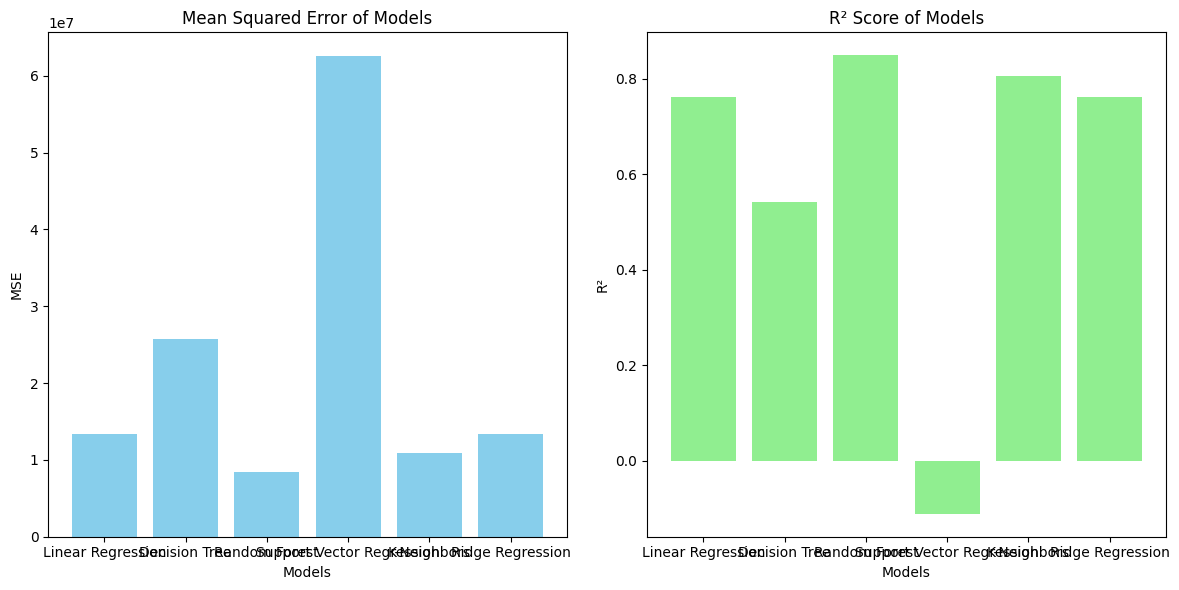

In [7]:
# Optional: Visualize the results
import matplotlib.pyplot as plt

# Bar plot for MSE
model_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]

plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Mean Squared Error of Models')
plt.xlabel('Models')
plt.ylabel('MSE')

# Bar plot for R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='lightgreen')
plt.title('R² Score of Models')
plt.xlabel('Models')
plt.ylabel('R²')

plt.tight_layout()
plt.show()